# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [28]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"


# Import Modules

importing all the needed python libraries.


In [29]:
import subprocess
import zipfile
import os
import shutil
import pandas as pd
import sqlite3
import requests
from io import StringIO
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

## Download datasets

In [30]:
datasets = [
    {"dataset": "berkeleyearth/climate-change-earth-surface-temperature-data", "file": "GlobalLandTemperaturesByCountry.csv"},
    {"dataset": "unitednations/global-food-agriculture-statistics", "file": "fao_data_crops_data.csv"}
]


# Function to download datasets from Kaggle
def download_datasets():
    for ds in datasets:
        os.system(f"kaggle datasets download -d {ds['dataset']} -p /tmp")
        os.system(f"unzip -o /tmp/{ds['dataset'].split('/')[-1]}.zip -d /tmp")
download_datasets()



### Look at the first table data

In [31]:

file_path = f"/tmp/GlobalLandTemperaturesByCountry.csv"
df = pd.read_csv(file_path)
print(df.head)

  

<bound method NDFrame.head of                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland 

  ### Transformation of first table

1. first remove NaN and columns with incomplete value 
2. change the format of dt column to datatime for better working with it
3. taking the year value for comparison with other table since it is based on year
4. filter the years more than 1961 since other table is only for the data above the given data
5. drop the uncertainity column
6. grouping the year and country to calculate the average tempreture of every country at the available years
7. change the name of average temperature to average_yearly_temperature for better clarification

In [32]:

df = df.dropna()
    # Fix errors or apply any transformations as needed
 # Load the data
  
df = pd.read_csv(file_path)

    # Convert the 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

    # Extract the year from the 'dt' column
df['year'] = df['dt'].dt.year

    # Filter the data to include only years greater than 1961
df_filtered = df[df['year'] > 1961]

    # Drop the 'AverageTemperatureUncertainty' column
df_filtered = df_filtered.drop(columns=['AverageTemperatureUncertainty'])

    # Group by year and country, then calculate the average temperature
df_grouped = df_filtered.groupby(['year', 'Country'])['AverageTemperature'].mean().reset_index()

    # Rename the columns for clarity
df_grouped.rename(columns={'AverageTemperature': 'average_yearly_temperature'}, inplace=True)
print(df_grouped.head)
df_first = df_grouped

<bound method NDFrame.head of        year         Country  average_yearly_temperature
0      1962     Afghanistan                   13.768667
1      1962          Africa                   24.194500
2      1962         Albania                   13.068750
3      1962         Algeria                   23.182417
4      1962  American Samoa                   26.627667
...     ...             ...                         ...
12631  2013  Western Sahara                   23.744250
12632  2013           Yemen                   28.129750
12633  2013          Zambia                   21.196000
12634  2013        Zimbabwe                   20.710750
12635  2013           Åland                    6.229750

[12636 rows x 3 columns]>


### Look at the second table data


In [33]:

file_path = f"/tmp/fao_data_crops_data.csv"
df = pd.read_csv(file_path)
print(df.head)

<bound method NDFrame.head of         country_or_area                                       element_code  \
0            Americas +                                                 31   
1            Americas +                                                 31   
2            Americas +                                                 31   
3            Americas +                                                 31   
4            Americas +                                                 31   
...                 ...                                                ...   
2255344              Fc                                    Calculated Data   
2255345              A   May include official, semi-official or estimat...   
2255346              NR                            Not reported by country   
2255347              F                                        FAO Estimate   
2255348              *                                   Unofficial figure   

                element    year u

### Info about the transformation

1. Droping the NaN values
2. checking the unique elements so that we can find the good value to messure the difference
3. choosing the most suitable elemnt which is the yield through hg/ha unit. 
4.Droping the useless elements

In [41]:
df = pd.read_csv(file_path)
    # Example transformation: drop missing values
df = df.dropna()
    # Fix errors or apply any transformations as needed

    #Listing the units and ways of estimating crops
print(df['element'].unique())
print(df['unit'].unique())

filtered_df_check = df[df['element'] == 'Yield']
print(filtered_df_check['unit'].unique())
    # Define the values you need in 'column2'
values_needed = ['Hg/Ha','tonnes']

    # Filter the DataFrame
filtered_df = df[df['unit'].isin(values_needed)]
print(filtered_df['element'].unique())
    # Columns to drop
columns_to_drop = ['element_code', 'value_footnotes']

    # Drop the specified columns
df_dropped = filtered_df.drop(columns=columns_to_drop)
df_second = df_dropped
print(df_second.head)
    # print(df_dropped)

['Area Harvested' 'Yield' 'Production Quantity' 'Seed'
 'Gross Production 1999-2001 (1000 I$)'
 'Net Production 1999-2001 (1000 I$)' 'Gross PIN (base 1999-2001)'
 'Grs per capita PIN (base 1999-2001)' 'Net PIN (base 1999-2001)'
 'Net per capita PIN (base 1999-2001)']
['Ha' 'Hg/Ha' 'tonnes' '1000 Int. $' 'Int. $']
['Hg/Ha']
['Yield' 'Production Quantity' 'Seed']
<bound method NDFrame.head of         country_or_area              element    year    unit     value  \
47           Americas +                Yield  2007.0   Hg/Ha   10921.0   
48           Americas +                Yield  2006.0   Hg/Ha   10921.0   
49           Americas +                Yield  2005.0   Hg/Ha   10921.0   
50           Americas +                Yield  2004.0   Hg/Ha   11188.0   
51           Americas +                Yield  2003.0   Hg/Ha   10842.0   
...                 ...                  ...     ...     ...       ...   
2255338         World +  Production Quantity  1965.0  tonnes  150123.0   
2255339       

### Merging tables and cleaning Data
Merging two tables based on date and country with inner join

In [42]:
# Merge DataFrames
result = pd.merge(df_second, df_first, left_on=['country_or_area', 'year'], right_on=['Country', 'year'], how ='inner')
# Check for NaN values
df= result
df.drop(columns='country_or_area', inplace=True)
print(df.head)


<bound method NDFrame.head of                     element    year    unit    value          category  \
0                     Yield  2007.0   Hg/Ha  12571.0  agave_fibres_nes   
1                     Yield  2006.0   Hg/Ha  12571.0  agave_fibres_nes   
2                     Yield  2005.0   Hg/Ha  12571.0  agave_fibres_nes   
3                     Yield  2004.0   Hg/Ha  12430.0  agave_fibres_nes   
4                     Yield  2003.0   Hg/Ha  11997.0  agave_fibres_nes   
...                     ...     ...     ...      ...               ...   
667727  Production Quantity  1966.0  tonnes    100.0    yautia_cocoyam   
667728  Production Quantity  1965.0  tonnes    100.0    yautia_cocoyam   
667729  Production Quantity  1964.0  tonnes    100.0    yautia_cocoyam   
667730  Production Quantity  1963.0  tonnes    100.0    yautia_cocoyam   
667731  Production Quantity  1962.0  tonnes     90.0    yautia_cocoyam   

            Country  average_yearly_temperature  
0          Colombia            

### Data exploration
Print some basic information about the data. first look at the overview.
we have no null data with the given type of data types here.

In [44]:
df.info()

df['Country'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667732 entries, 0 to 667731
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   element                     667732 non-null  object 
 1   year                        667732 non-null  float64
 2   unit                        667732 non-null  object 
 3   value                       667732 non-null  float64
 4   category                    667732 non-null  object 
 5   Country                     667732 non-null  object 
 6   average_yearly_temperature  667732 non-null  float64
dtypes: float64(3), object(4)
memory usage: 35.7+ MB


array(['Colombia', 'Cuba', 'Ecuador', 'El Salvador', 'Guatemala',
       'Mexico', 'Nicaragua', 'Philippines', 'Afghanistan', 'Algeria',
       'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bulgaria',
       'Burkina Faso', 'Chile', 'China', 'Croatia', 'Cyprus', 'France',
       'Georgia', 'Greece', 'Hungary', 'Iraq', 'Israel', 'Italy',
       'Jordan', 'Kazakhstan', 'Kyrgyzstan', 'Lebanon', 'Moldova',
       'Morocco', 'Nepal', 'Pakistan', 'Portugal', 'Slovenia', 'Spain',
       'Swaziland', 'Tajikistan', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Ukraine', 'United Arab Emirates', 'Uzbekistan', 'Yemen',
       'Bangladesh', 'Canada', 'Denmark', 'Egypt', 'Ethiopia', 'India',
       'Kenya', 'Madagascar', 'Malawi', 'Netherlands', 'Peru', 'Poland',
       'Romania', 'Slovakia', 'Zimbabwe', 'Albania', 'Austria', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Brazil', 'Czech Republic',
       'Estonia', 'Finland', 'Germany', 'Grenada', 'Honduras', 'Ireland',
       'Japan', 'La

In [45]:
## statistical summary of our data
df.describe()

,year,value,average_yearly_temperature
count,667732.000000,6.677320e+05,667732.000000
mean,1985.532116,3.663707e+05,19.970980
std,13.449576,5.158255e+06,7.852389
min,1962.000000,0.000000e+00,-19.857750
25%,1974.000000,1.232000e+03,14.439250
50%,1986.000000,1.334150e+04,22.881417
75%,1997.000000,7.666225e+04,26.174417
max,2007.000000,4.583956e+08,29.860000


### Variable Declaration


* element: It shows what type of product is it. either as previously shown it is a crop or seed or it is the yield. We cleaned these three types since they basiaccly consider different aspects of warming effect. As there might be seeds but with no outcome. Or we have to consider the land being used as a crucial parameter on affecting the environment.
* year: the year that this data has occured
* unit: the unit of element which for example can be hg/ha which is a common way of messuring the yield based on land.
* value: the amount of element based on unit
* category:which type of product it is. Is it fibre which is common for industrial used rather than full food usage.
* Country: the country and the region which has the given product.
* average_yearly_temperature: As previously shown we had the data regarding every days temprature but through the data modification we get the data for every year by averaging the days of that month and omitting the empty datas.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667732 entries, 0 to 667731
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   element                     667732 non-null  object 
 1   year                        667732 non-null  float64
 2   unit                        667732 non-null  object 
 3   value                       667732 non-null  float64
 4   category                    667732 non-null  object 
 5   Country                     667732 non-null  object 
 6   average_yearly_temperature  667732 non-null  float64
dtypes: float64(3), object(4)
memory usage: 35.7+ MB


### Data cleaning


In [58]:

# Number of unique elements in column 'Country'
number_of_unique_in_Country = df['Country'].nunique()

print(number_of_unique_in_Country) 

number_of_elem_in_Country = df['Country'].count()
 
print (number_of_elem_in_Country)


# lets check based only on yields
values_needed = ['Hg/Ha']
df = df[df['unit'].isin(values_needed)]

# we sort our data based on yields
sorted_df = df.sort_values(by='value', ascending=False)
# Viewing 10 rows with limited columns
desired_columns = [ 'Country', 'value','year','average_yearly_temperature']
subset_data = sorted_df[desired_columns].iloc[:10]
print(subset_data)

171
371868
            Country        value    year  average_yearly_temperature
226977  Netherlands  137495555.0  1980.0                    9.464917
226973  Netherlands  124483409.0  1984.0                    9.697417
226978  Netherlands  121750000.0  1979.0                    8.885417
226975  Netherlands  116828000.0  1982.0                   10.336250
226979  Netherlands  109966666.0  1978.0                    9.344417
226974  Netherlands  105628000.0  1983.0                   10.357417
226976  Netherlands   71026415.0  1981.0                    9.639917
226981  Netherlands   68062500.0  1976.0                   10.164750
226980  Netherlands   62835714.0  1977.0                   10.037333
226983  Netherlands   56794117.0  1974.0                   10.125750


### fetches columns with missing data in our data
showing no Nan value

In [59]:
sorted_df.columns[sorted_df.isnull().any()]

Index([], dtype='object')

# Visualization

### Categorical data


Finding the number of data regarding top countries

Country
Mexico       5259
Spain        4857
Peru         4815
Turkey       4783
Morocco      4548
Italy        4435
Greece       4379
India        4270
Kenya        4232
Australia    4227
Name: count, dtype: int64


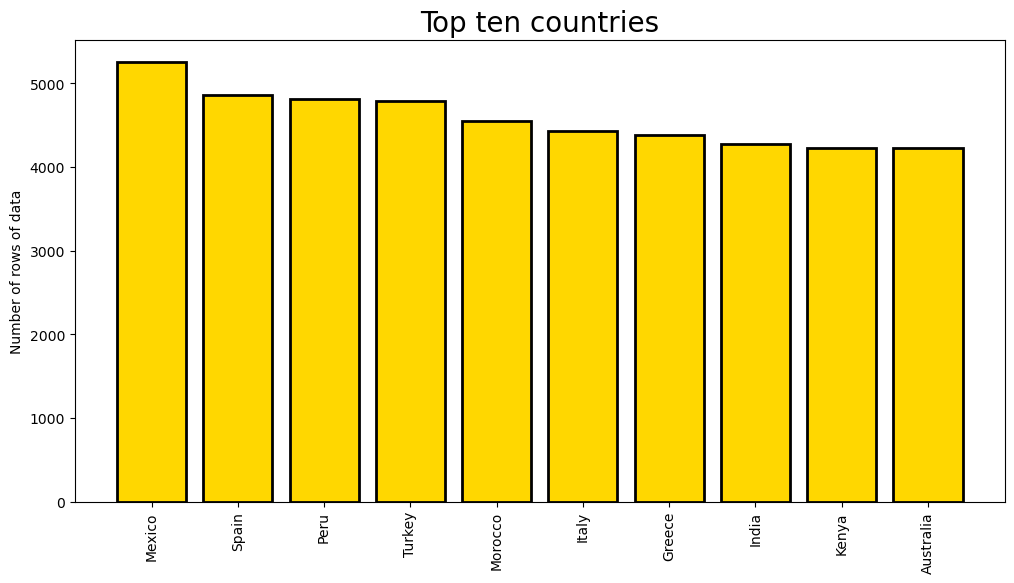

In [63]:
value_counts_A = sorted_df['Country'].value_counts()
# Select the top ten elements
top_ten_elements = value_counts_A.head(10)

print(top_ten_elements)
# visualize
# Bar plot explained in detail in another of my kernel
plt.figure(figsize=(12,6))
plt.bar(top_ten_elements.index, top_ten_elements.values,color = "gold", edgecolor = "black", linewidth = 2)
plt.xticks(rotation = "vertical",size = 10)
plt.ylabel("Number of rows of data")
plt.title("Top ten countries",size = 20)
plt.show()

## Based on Numerical Variable


Here we check the  top 20 producers of  year 1989


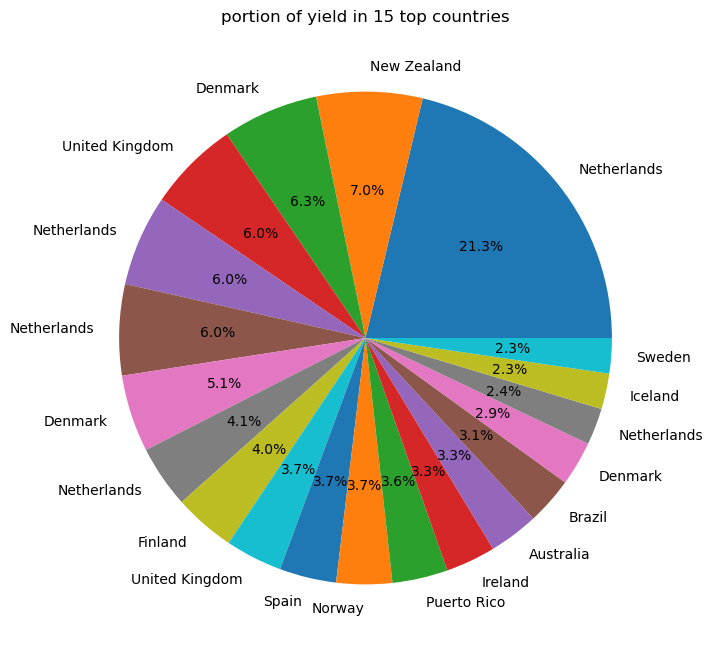

In [73]:
filtered_df = df[df['year'] == 1989]

sorted_df = filtered_df.sort_values(by='value', ascending=False)
# selecting top 20 of them
top_20=sorted_df.head(20)


# doing visualization for this portion
plt.figure(figsize=(10, 8))
plt.pie(top_20['value'], labels=top_20['Country'], autopct='%1.1f%%')
plt.title('portion of yield in 20 top countries in year 1989')
plt.show()

As you can see Netherlands is always a key producer of different types of categories.

### Checking the effect of yield production on tempreture

Highest yield country: Netherlands
Lowest yield country: Mexico
Median yield country: Colombia


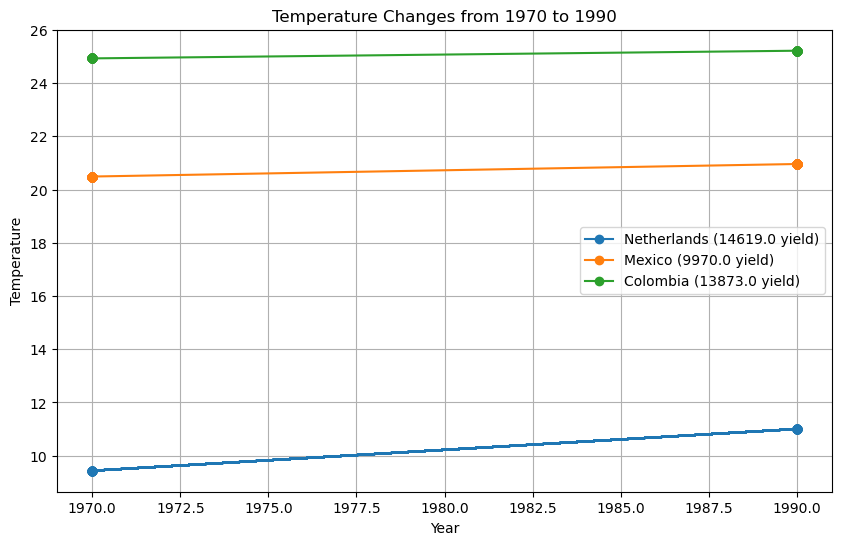

In [77]:
# Filter data for the years 1970 to 1990
filtered_df = df[df['year'].isin([1970, 1990])]
# Identify the country with the highest yield
highest_yield_country = df.loc[df['value'].idxmax()]['Country']

# Identify the country with the lowest yield
lowest_yield_country = df.loc[df['value'].idxmin()]['Country']

# Identify the country with the median yield
median_yield = df['value'].median()
median_yield_country = df.iloc[(df['value'] - median_yield).abs().argsort()[:1]]['Country'].values[0]

print(f"Highest yield country: {highest_yield_country}")
print(f"Lowest yield country: {lowest_yield_country}")
print(f"Median yield country: {median_yield_country}")
# Filter the data for the selected countries
selected_countries = [highest_yield_country, lowest_yield_country, median_yield_country]
selected_df = filtered_df[filtered_df['Country'].isin(selected_countries)]

# Plot the temperature changes
plt.figure(figsize=(10, 6))

for country in selected_countries:
    country_df = selected_df[selected_df['Country'] == country]
    plt.plot(country_df['year'], country_df['average_yearly_temperature'], marker='o', label=f'{country} ({country_df["value"].iloc[0]} yield)')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Changes from 1970 to 1990')
plt.legend()
plt.grid(True)
plt.show()

